In [1]:
import glob
from os import path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import rulevetting
from rulevetting.api import viz


In [2]:
raw_data_path = path.join(rulevetting.DATA_PATH, "csi_pecarn", "raw")
fnames = sorted(glob.glob(f'{raw_data_path}/*'))
dfs = [pd.read_csv(fname) for fname in fnames]

In [3]:
def plot_missing_value_information(dataset: pd.DataFrame, figsize = (6, 8)) -> None:
    col_missing_vals = dataset.isna().astype(int).sum(axis=0).sort_values(ascending=False)
    col_missing_vals = col_missing_vals[col_missing_vals > 0]

    plt.figure(figsize=figsize)
    sns.set(font_scale=1)
    sns.barplot(y=col_missing_vals.index, x=col_missing_vals)
    plt.show()

def print_missing_value_information(dataset: pd.DataFrame, lrange: int, rrange: int) -> pd.Series:
    col_missing_vals = dataset.isna().astype(int).sum(axis=0).sort_values(ascending=False)
    col_missing_vals = col_missing_vals[col_missing_vals > 0]

    print("shape if we remove all rows with missing values: ", 
          dataset.dropna(axis=0).shape)

    print("drop n columns highest in missing values, then remove all rows with missing values: ")
    for n in range(lrange, rrange):
        print(f'n = {n}', dataset.drop(col_missing_vals.index[:n], axis=1).dropna(axis=0).shape)

    return col_missing_vals

def plot_correlation(dataset: pd.DataFrame) -> None:
    corrs = dataset.corr(method='pearson')
    corrmap = sns.clustermap(corrs, cmap=viz.cmap_div, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
    #                figsize=(12, 12))
    corrmap.ax_row_dendrogram.set_visible(False)
    corrmap.ax_col_dendrogram.set_visible(False)

    plt.show()

In [4]:
pd.DataFrame(index=[path.basename(fname) for fname in fnames],
             data={"shape": [df.shape for df in dfs]})
             

,shape
analysisvariables.csv,"(3314, 36)"
clinicalpresentationfield.csv,"(3314, 101)"
clinicalpresentationoutside.csv,"(3314, 114)"
clinicalpresentationsite.csv,"(3314, 136)"
demographics.csv,"(3314, 11)"
injuryclassification.csv,"(540, 208)"
injurymechanism.csv,"(3314, 35)"
kappa.csv,"(365, 124)"
medicalhistory.csv,"(3314, 32)"
radiologyoutside.csv,"(3314, 16)"


### analysis variables (derived with domain knowledge)

#### missing values

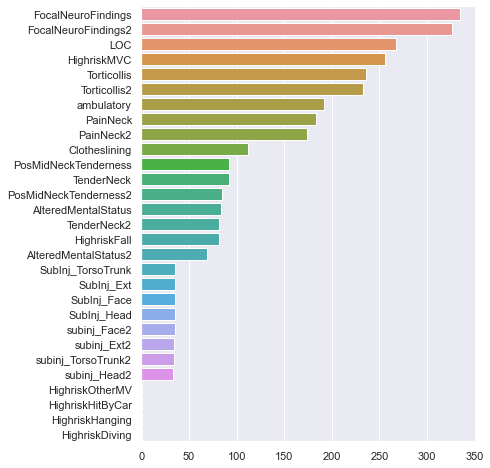

In [5]:
plot_missing_value_information(dfs[0])

In [6]:
missing_values_sorted = print_missing_value_information(dfs[0], lrange=1, rrange=10)

shape if we remove all rows with missing values:  (1986, 36)
drop n columns highest in missing values, then remove all rows with missing values: 
n = 1 (1989, 35)
n = 2 (2152, 34)
n = 3 (2286, 33)
n = 4 (2491, 32)
n = 5 (2492, 31)
n = 6 (2656, 30)
n = 7 (2801, 29)
n = 8 (2806, 28)
n = 9 (2952, 27)


#### correlation

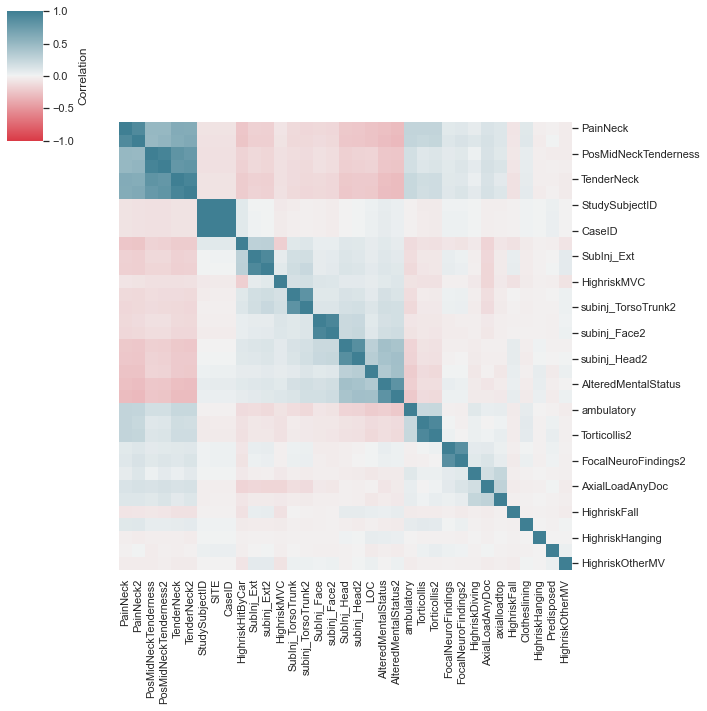

In [7]:
plot_correlation(dfs[0])

see that there are some columns which have almost same name and are highly correlated (e.g. torticollis and torticollis2)

**Q**: how to reconcile 

**Q**: should we just use these? 

### clinical presentation field

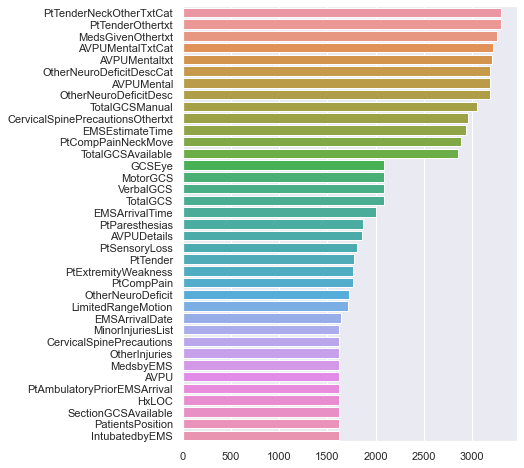

In [8]:
plot_missing_value_information(dfs[1])

In [9]:
missing_values_sorted = print_missing_value_information(dfs[1], lrange=12, rrange=28)

shape if we remove all rows with missing values:  (0, 101)
drop n columns highest in missing values, then remove all rows with missing values: 
n = 12 (0, 89)
n = 13 (691, 88)
n = 14 (691, 87)
n = 15 (691, 86)
n = 16 (691, 85)
n = 17 (930, 84)
n = 18 (1195, 83)
n = 19 (1243, 82)
n = 20 (1448, 81)
n = 21 (1462, 80)
n = 22 (1472, 79)
n = 23 (1487, 78)
n = 24 (1529, 77)
n = 25 (1573, 76)
n = 26 (1668, 75)
n = 27 (1691, 74)


best we could do is 1691 rows

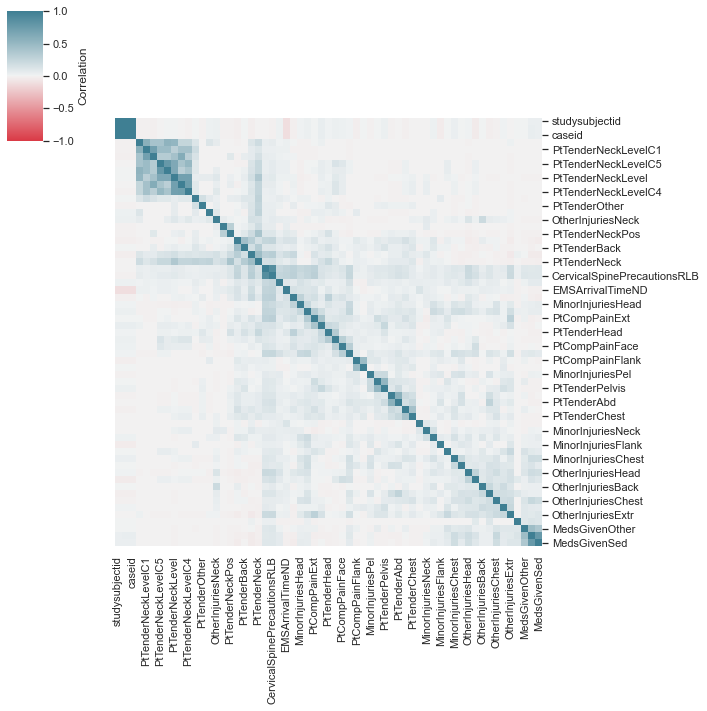

In [10]:
df_subset = (
    dfs[1].drop(missing_values_sorted.index, axis=1)
    .drop("OtherInjuriesFlank", axis=1).select_dtypes(include=np.number))
plot_correlation(df_subset)

### clinical presentation outside

appears to be same fields as clinical presentation field

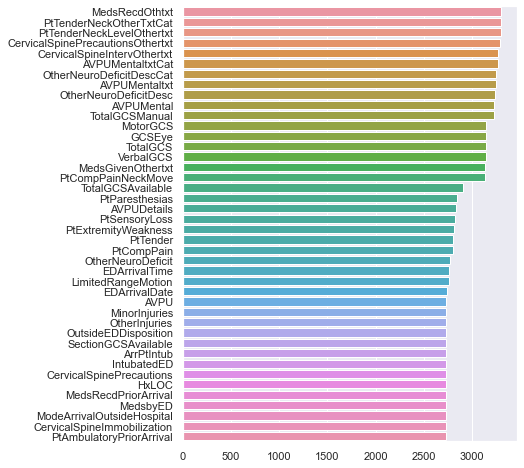

In [11]:
plot_missing_value_information(dfs[2])

In [12]:
missing_values_sorted = print_missing_value_information(dfs[2], lrange=14, rrange=29)

shape if we remove all rows with missing values:  (0, 114)
drop n columns highest in missing values, then remove all rows with missing values: 
n = 14 (0, 100)
n = 15 (19, 99)
n = 16 (105, 98)
n = 17 (244, 97)
n = 18 (354, 96)
n = 19 (372, 95)
n = 20 (444, 94)
n = 21 (455, 93)
n = 22 (462, 92)
n = 23 (469, 91)
n = 24 (496, 90)
n = 25 (523, 89)
n = 26 (551, 88)
n = 27 (580, 87)
n = 28 (584, 86)


best we can do is 586 rows

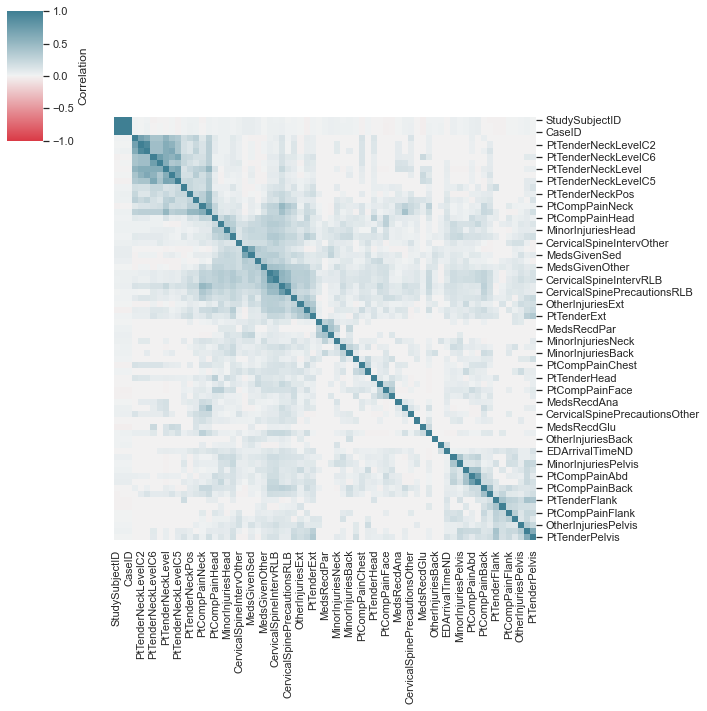

In [13]:
df_subset = (
    dfs[2].drop(missing_values_sorted.index, axis=1)
    .drop("PtTenderNeckAnt", axis=1).select_dtypes(include=np.number))
plot_correlation(df_subset)

### clinical presentation site

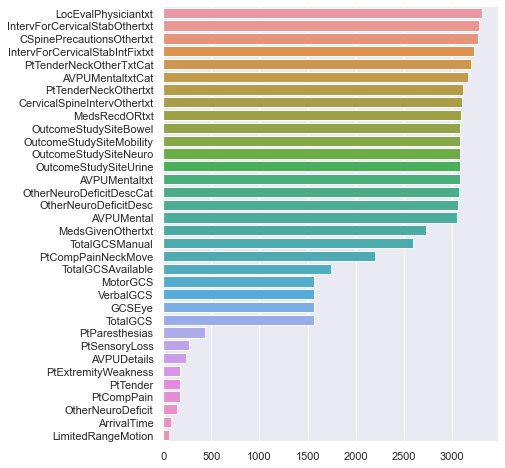

In [14]:
plot_missing_value_information(dfs[3])

In [15]:
missing_values_sorted = print_missing_value_information(dfs[3], lrange=20, rrange=35)

shape if we remove all rows with missing values:  (0, 136)
drop n columns highest in missing values, then remove all rows with missing values: 
n = 20 (0, 116)
n = 21 (1332, 115)
n = 22 (1332, 114)
n = 23 (1332, 113)
n = 24 (1332, 112)
n = 25 (2566, 111)
n = 26 (2708, 110)
n = 27 (2758, 109)
n = 28 (2934, 108)
n = 29 (2953, 107)
n = 30 (2976, 106)
n = 31 (3053, 105)
n = 32 (3171, 104)
n = 33 (3253, 103)
n = 34 (3314, 102)


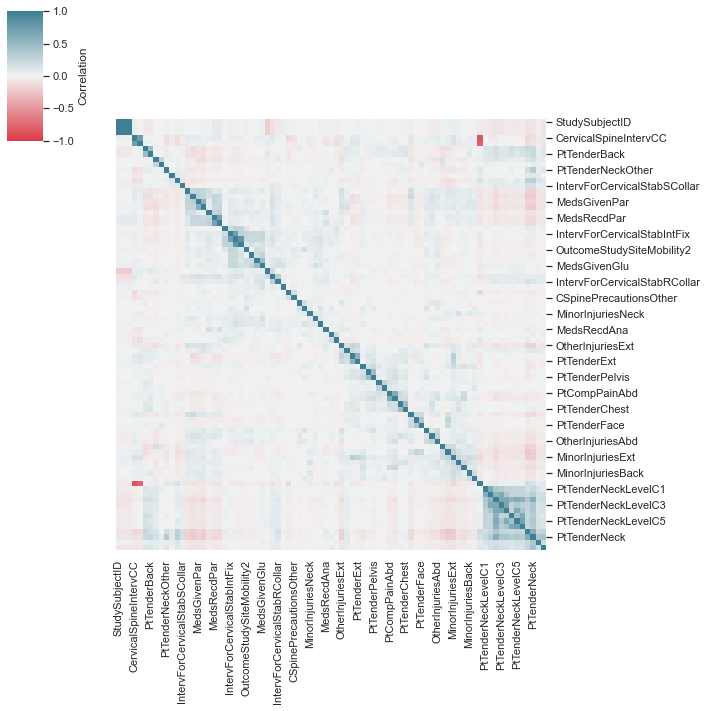

In [16]:
df_subset = (
    dfs[3].drop(missing_values_sorted.index[:25], axis=1).select_dtypes(include=np.number))
plot_correlation(df_subset)

### demographics

In [17]:
dfs[4].head()

,site,caseid,controltype,studysubjectid,AgeInYears,Gender,Race,Ethnicity,PayorType,PayorTypeCI,PayorTypeMA
0,1,110001,case,110001,15.71,M,W,NH,CI,MC,NaN
1,1,110002,case,110002,15.94,F,B,NH,MA,NaN,MC
2,1,110003,case,110003,14.53,F,W,NH,MA,NaN,MC
3,1,110004,case,110004,14.96,M,W,NH,CI,MC,NaN
4,1,110005,case,110005,13.23,M,W,NH,CI,MC,NaN


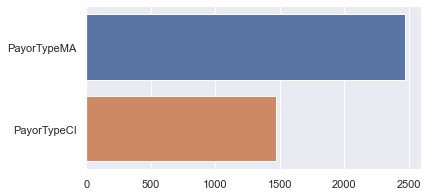

In [18]:
plot_missing_value_information(dfs[4], figsize=(6, 3))

In [19]:
missing_values_sorted = print_missing_value_information(dfs[4], lrange=0, rrange=3)

shape if we remove all rows with missing values:  (0, 11)
drop n columns highest in missing values, then remove all rows with missing values: 
n = 0 (0, 11)
n = 1 (1842, 10)
n = 2 (3314, 9)


### injury classification

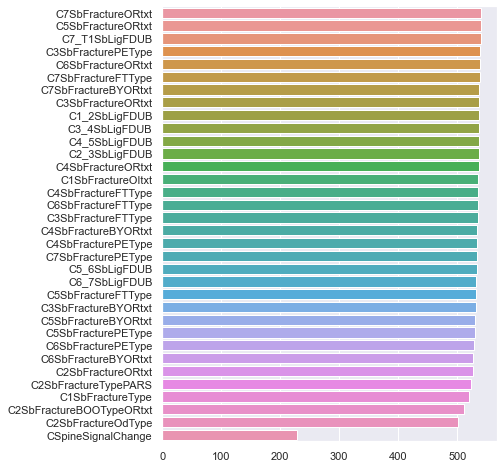

In [20]:
plot_missing_value_information(dfs[5])

In [21]:
missing_values_sorted = print_missing_value_information(dfs[5], lrange=30, rrange=36)

shape if we remove all rows with missing values:  (0, 208)
drop n columns highest in missing values, then remove all rows with missing values: 
n = 30 (0, 178)
n = 31 (1, 177)
n = 32 (19, 176)
n = 33 (311, 175)
n = 34 (540, 174)
n = 35 (540, 174)


one row per case (540 cases total)

/Users/keyan/anaconda3/envs/rulevet/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


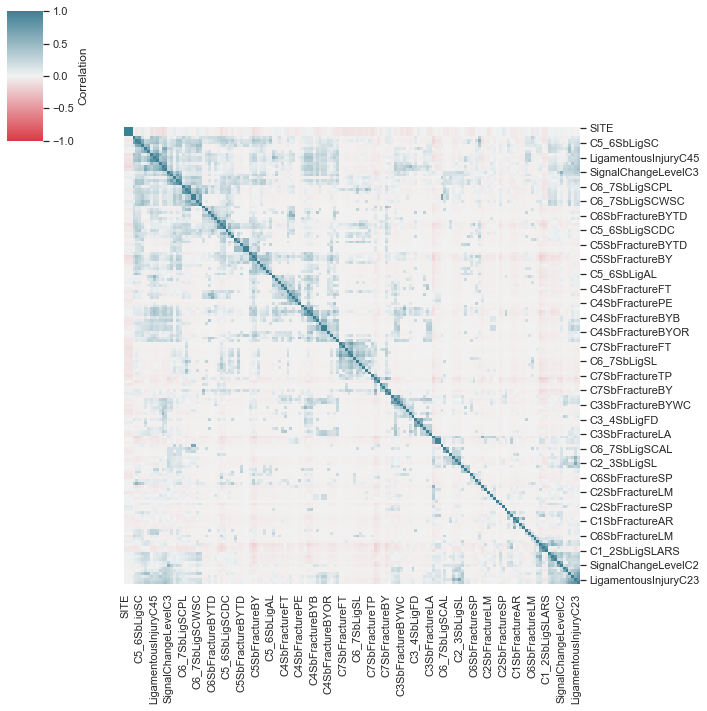

In [22]:
df_subset = (
    dfs[5].drop(missing_values_sorted.index, axis=1).select_dtypes(include=np.number))
df_subset = df_subset.loc[:, df_subset.sum(axis=0) > 0]
plot_correlation(df_subset)

### injury mechanism

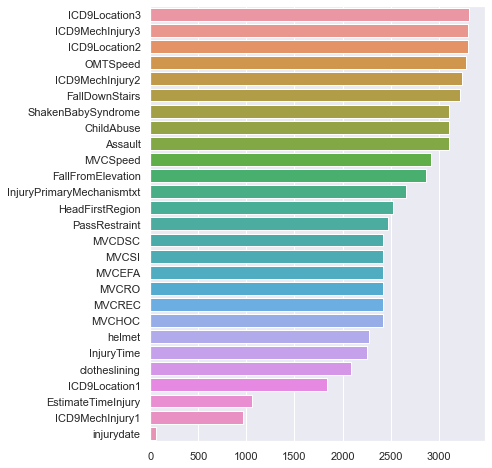

In [23]:
plot_missing_value_information(dfs[6])

In [24]:
missing_values_sorted = print_missing_value_information(dfs[6], lrange=21, rrange=28)

shape if we remove all rows with missing values:  (0, 35)
drop n columns highest in missing values, then remove all rows with missing values: 
n = 21 (0, 14)
n = 22 (385, 13)
n = 23 (1010, 12)
n = 24 (1577, 11)
n = 25 (2307, 10)
n = 26 (3255, 9)
n = 27 (3314, 8)


### kappa

In [25]:
dfs[7].shape

(365, 124)

### medical history

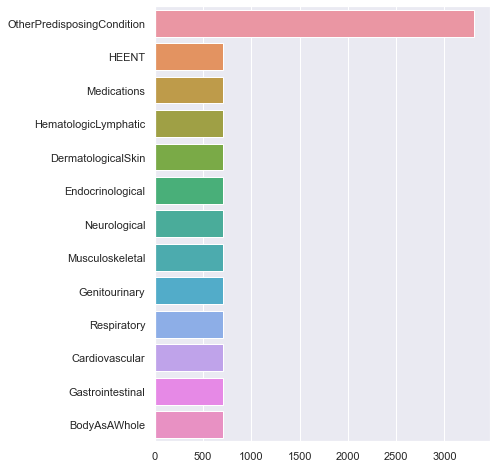

In [26]:
plot_missing_value_information(dfs[8])

In [27]:
missing_values_sorted = print_missing_value_information(dfs[8], lrange=0, rrange=14)

shape if we remove all rows with missing values:  (13, 32)
drop n columns highest in missing values, then remove all rows with missing values: 
n = 0 (13, 32)
n = 1 (2602, 31)
n = 2 (2602, 30)
n = 3 (2602, 29)
n = 4 (2602, 28)
n = 5 (2602, 27)
n = 6 (2602, 26)
n = 7 (2602, 25)
n = 8 (2602, 24)
n = 9 (2602, 23)
n = 10 (2602, 22)
n = 11 (2602, 21)
n = 12 (2602, 20)
n = 13 (3314, 19)


### radiology outside

In [28]:
dfs[9].head()

,SITE,CaseID,ControlType,StudySubjectID,OutsideED,Xrays,XraysViewAP,XraysViewLt,XraysViewOM,XraysViewFE,XraysViewSW,XraysViewOt,CTPerformed,MRIPerformed,WrittenOrDictatedConsult,OperativeReport
0,1,110001,case,110001,SITE,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,1,110002,case,110002,SITE,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,1,110003,case,110003,SITE,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,1,110004,case,110004,EDNA,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,1,110005,case,110005,EDA,Y,0,1,0,1,0,0,Y,N,N,N


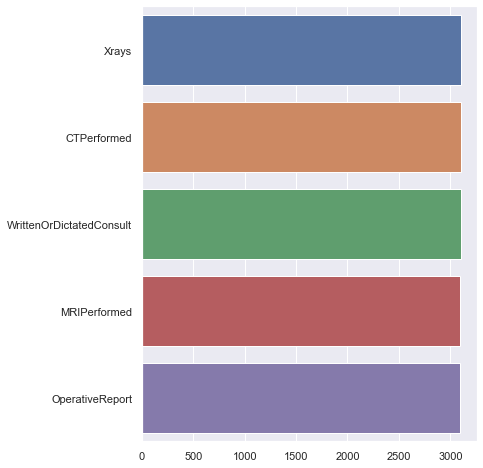

In [29]:
plot_missing_value_information(dfs[9])

In [30]:
missing_values_sorted = print_missing_value_information(dfs[9], lrange=0, rrange=6)

shape if we remove all rows with missing values:  (213, 16)
drop n columns highest in missing values, then remove all rows with missing values: 
n = 0 (213, 16)
n = 1 (213, 15)
n = 2 (213, 14)
n = 3 (221, 13)
n = 4 (221, 12)
n = 5 (3314, 11)


### radiology review (subset of cases only)

In [31]:
dfs[10].head()

,SITE,CaseID,ControlType,StudySubjectID,reviewResultNumOfViews,reviewResult,reviewResultAT_DF,reviewResultAT_LI,reviewResultAT_OA,reviewResultEQ_PF,reviewResultEQ_LL,reviewResultEQ_AS,reviewResultEQ_LI,reviewResultEQ_OF,reviewResultIV,reviewResultCA
0,1,110001,case,110001,2,NM,0,0,0,0,0,0,0,0,IVN,CAN
1,1,110002,case,110002,3,AT,1,0,0,0,0,0,0,0,IVND,CAN
2,1,110003,case,110003,3,AT,1,0,0,0,0,0,0,0,IVY,CAN
3,1,110004,case,110004,3,AT,1,0,0,0,0,0,0,0,IVND,CAN
4,1,110006,case,110006,3,AT,1,0,0,0,0,0,0,0,IVND,CAN


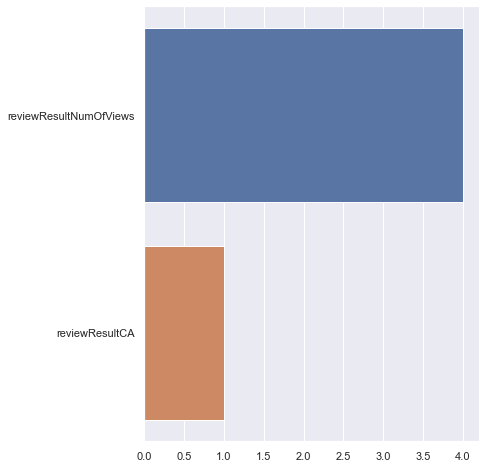

In [32]:
plot_missing_value_information(dfs[10])

In [33]:
missing_values_sorted = print_missing_value_information(dfs[10], lrange=0, rrange=4)

shape if we remove all rows with missing values:  (440, 16)
drop n columns highest in missing values, then remove all rows with missing values: 
n = 0 (440, 16)
n = 1 (444, 15)
n = 2 (445, 14)
n = 3 (445, 14)


### radiology site

In [34]:
dfs[11].head()

,SITE,CaseID,ControlType,StudySubjectID,Xrays,XraysViewAP,XraysViewLt,XraysViewOM,XraysViewFE,XraysViewSW,XraysViewOt,CTPerformed,MRIPerformed,WrittenOrDictatedConsult,OperativeReport
0,1,110001,case,110001,Y,1,1,0,0,0,0,Y,Y,Y,N
1,1,110002,case,110002,Y,1,1,1,0,0,0,N,N,N,N
2,1,110003,case,110003,Y,1,1,1,0,1,0,Y,N,Y,N
3,1,110004,case,110004,Y,1,1,1,0,0,0,Y,N,Y,N
4,1,110005,case,110005,N,0,0,0,0,0,0,N,Y,Y,N


In [35]:
missing_values_sorted = print_missing_value_information(dfs[11], lrange=0, rrange=1)

shape if we remove all rows with missing values:  (3314, 15)
drop n columns highest in missing values, then remove all rows with missing values: 
n = 0 (3314, 15)
